## 초기 setting

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr
 
def rargmax(vector):
    """ Argmax that chooses randomly among eligible maximum indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)
 
 
register(
    id='FrozenLake-v1',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True}
)
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)

In [2]:
env = gym.make('FrozenLake-v0')

# env = gym.make('FrozenLake-v3')

## Q-learning

Success rate: 0.0695
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.00000000e+00 0.00000000e+00 2.25182311e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.08411401e-03]
 [0.00000000e+00 3.94084133e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.16552630e-02]
 [3.23866365e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.48933410e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.09771274e-02]
 [0.00000000e+00 0.00000000e+00 3.00848504e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.13130624e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.91494221e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.96119344e-01 0.00000000

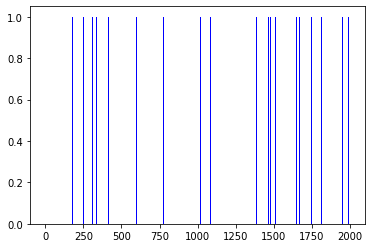

In [ ]:

# Q : num_environment * num_action
Q = np.zeros([env.observation_space.n, env.action_space.n])
 
# reward_list : total rewards per episode
reward_list = []
num_episodes = 2000
discount= 0.99
learning_rate = 0.85

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    sum_reword= 0
    done = False
 
    # The Q-Table learning algorithm
    while not done:
        # action = rargmax(Q[state])
        action = np.argmax(Q[state, :]+ np.random.randn(1, env.action_space.n)/(i + 1))
  

        new_state, reward, done, _ = env.step(action)
 
        # Update Q-Table with new knowledge using learning rate
        # Q[state, action] = reward + np.max(Q[new_state])
        Q[state, action] = (1-learning_rate) * Q[state, action]\
										+ learning_rate * (reward + discount * np.max(Q[new_state]))
        sum_reword += reward
        state = new_state
 
    reward_list.append(sum_reword)
 
print("Success rate: " + str(sum(reward_list) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(reward_list)), reward_list, color="blue")
plt.show()

## DQN (Q-learning with Networks)

In [6]:
import tensorflow as tf
def one_hot(x):
  return np.identity(16)[x:x+1]

In [ ]:
input_size = env.observation_space.n  # input : state
output_size = env.action_space.n      # output: action

X = tf.playholder()